AI Programming - SW Lee

# Lab 02: Simple Deep Neural Network
## Exercise: Predicting MNIST Digits

### Prepare Mini-MNIST Dataset from Scikit-Learn
http://yann.lecun.com/exdb/mnist/

In [1]:
import numpy as np # 넘파이 사용
from sklearn.datasets import load_digits # 손글씨 데이터셋 사용
from sklearn.model_selection import train_test_split # 훈련 데이터와 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler  # 표준화
import matplotlib.pyplot as plt  # 그래프 그리기

In [2]:
# 1. 데이터 로드
# skearn의 load_digits()를 이용하여 손글씨 데이터를 로드한다.
digits = load_digits()

# 2. 데이터 전처리
# digits.images는 1797개의 8x8 픽셀 이미지 데이터를 가지고 있다. (1797, 8, 8) shape의 3차원 배열
# digits.target은 1797개의 이미지 데이터에 대한 정답 레이블을 가지고 있다.
# digits_df는 1797개의 이미지 데이터를 1차원 배열로 변환한 데이터이다. shape는 (1797, 64)
digits_df = digits.images.reshape((len(digits.target), -1))

# digits_tf는 1797개의 이미지 데이터에 대한 정답 레이블을 가지고 있다.
digits_tf = digits.target

# 3. 데이터 분할
# sklearn의 train_test_split()을 이용하여 데이터를 학습 데이터와 테스트 데이터로 나눈다.
# test_size는 0.20으로 설정하였다. 즉, 80%의 데이터를 학습 데이터로, 20%의 데이터를 테스트 데이터로 사용한다.
X_train_org, X_test_org, y_train_num, y_test = train_test_split(digits_df, digits_tf, test_size= 0.20, random_state= 101)

# StandardScaler를 이용하여 데이터를 정규화한다.
# digits 데이터는 [0, 16]의 범위를 가지고 있어서 너무 큰 지수값을 가지게 되므로 정규분포의 [0, 1]로 만들어주는 것이 좋다.
# StandardScaler를 사용하여 데이터를 평균이 0이고 분산이 1인 정규 분포로 변환합니다.
sc = StandardScaler()
# 학습 데이터에 대해 스케일링을 적용하고, 변환된 데이터를 X_train에 저장합니다.
X_train = sc.fit_transform(X_train_org)
# 테스트 데이터에는 학습 데이터에서 학습된 스케일링을 동일하게 적용합니다.
X_test = sc.transform(X_test_org)

# 3. 클래스 레이블을 원-핫 인코딩으로 변환
# 손글씨 데이터는 0부터 9까지의 숫자로 이루어져 있으므로, 10개의 클래스로 분류할 수 있다.
n_classes = 10

# y_train_num은 (N,) shape의 1차원 배열이다. 이를 (N, 10) shape의 2차원 배열로 변환한다.
y_train = np.zeros((y_train_num.shape[0],10))

# 각 샘플에 대해 해당하는 클래스에 1을 부여한다.
# 예를 들어
# y_train_num = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 일 때
# y_train = [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#            [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
#            [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
#            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
#            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
#            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
#            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
#            [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
# 위와 같이 변환한다.
for i in range(n_classes): # 0부터 9까지
    y_train[:,i] = (y_train_num == i) # y_train_num과 i가 같으면 1, 다르면 0


Define Utility Functions

Sigmoid function can be defined as:

$$ \text{sigmoid}(x) = {1 \over {1 + e^{-x}}} = {e^{x} \over {1 + e^{x}}} $$

Sigmoid function takes numbers between $[-\infty, \infty]$ and gives back numbers between $[0, 1]$.<br>
However, the corresponding numpy implementation warns overflow for large negative inputs.<br>
The function below is the implementation of numerically stable sigmoid. Complete the code **without using `if` statement**.

In [3]:
def mySigmoid(x):
    ### START CODE HERE ###

    positive = x >= 0      # boolean array of positive numbers
    x_p = 1 / (1 + np.exp(-x))          # array of positive x
    x_n = np.exp(x) / (1 + np.exp(x))          # array of negative x
    x = np.where(positive, x_p, x_n)            # apply sigmoid function for both x_p and x_n

    ### END CODE HERE ###
    return x # 시그모이드 함수를 적용한 결과를 반환

In [4]:
mySigmoid(np.array([0.0, 1000.0, -1000.0]))

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6532\1714061335.py:5: RuntimeWarning: overflow encountered in exp
  x_p = 1 / (1 + np.exp(-x))          # array of positive x
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6532\1714061335.py:6: RuntimeWarning: overflow encountered in exp
  x_n = np.exp(x) / (1 + np.exp(x))          # array of negative x
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6532\1714061335.py:6: RuntimeWarning: invalid value encountered in divide
  x_n = np.exp(x) / (1 + np.exp(x))          # array of negative x


array([0.5, 1. , 0. ])

Softmax function can be defined as:

$$ \text{softmax}(x_i) = {e^{x_i} \over {\sum_{k=1}^n e^{x_k}}} $$

Softmax function also takes numbers between $[-\infty, \infty]$ and gives back numbers between $[0, 1]$.<br>
Therefore, this function has the same overflow problem for large positive inputs.<br>
The function below is the implementation of numerically stable softmax.<br>
You can make the softmax stable by multiplying $e^{-M}$ to both numerator and denominator. <br>
Complete the code **without using `if` statement**.

In [5]:
# define softmax. Assume (b, s)
# 소프트맥스 함수는 신경망의 출력층에서 사용되는 활성화 함수로, 각 클래스에 대한 확률 분포를 생성합니다. 이를 통해 모델이 각 클래스에 속할 확률 값을 출력할 수 있게 합니다. 
def mySoftmax(x):
    ### START CODE HERE ###

    x = x - np.max(x, axis=-1, keepdims=True)        # make x sufficiently small
    x = np.exp(x)        # execute exponential function
    x = x / np.sum(x, axis=-1, keepdims=True)        # calculate softmax

    ### END CODE HERE ###
    return x

In [6]:
mySoftmax(np.array([0.0, 1000.0, -1000.0])) # 소프트맥스 함수를 통과한 결과

array([0., 1., 0.])

(1797, 64)
(1437, 64)
(1437, 10)
[ 0.  0.  0.  9. 16.  6.  0.  0.  0.  0.  4. 15.  6. 15.  0.  0.  0.  0.
  8. 11.  9. 11.  0.  0.  0.  0.  8. 16. 14.  2.  0.  0.  0.  0. 11. 16.
 13.  0.  0.  0.  0.  6. 14.  2. 12.  9.  0.  0.  0.  5. 16. 11.  5. 13.
  4.  0.  0.  0.  3.  8. 13. 16.  9.  0.]


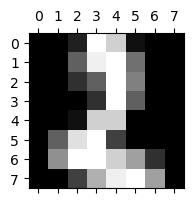

The number is 2


In [19]:
# 데이터 1797개이고 8*8=64개의 픽셀을 가지고 있으므로, 입력 노드의 개수는 64개이다.
print(digits_df.shape)
# 데이터를 80%의 학습 데이터와 20%의 테스트 데이터로 나누었으므로, 학습 데이터는 1437개, 테스트 데이터는 360개이다.
print(X_train.shape)
# 데이터를 80%의 학습 데이터와 20%의 테스트 데이터로 나누었으므로, 학습 데이터는 1437개, 테스트 데이터는 360개이다.
# 또한 10개의 클래스로 분류하므로, 출력 노드의 개수는 10개이다.
print(y_train.shape)
# 학습 데이터의 첫 번째 샘플을 출력한다.
print(X_train_org[0]) # x_train_org은 0~16의 값으로 이루어진 64개의 픽셀값을 가지고 있음

# 학습 데이터의 첫 번째 샘플을 이미지로 출력한다.
idx = np.random.randint(X_train.shape[0])
# 이미지 데이터는 8*8=64개의 픽셀을 가지고 있으므로, 8*8의 이미지로 reshape한다.
dimage = X_train_org[idx].reshape((8,8))
# 이미지를 출력한다.
plt.figure(figsize=(2, 2))
# 이미지를 흑백으로 출력한다.
plt.gray()
# matshow()는 행렬 데이터를 이미지로 출력하는 함수이다. (행렬 데이터, fignum=1)은 행렬 데이터를 이미지로 출력하고, 이미지를 출력할 창의 번호를 1로 설정한다.
plt.matshow(dimage, fignum=1)
# 이미지를 출력한다.
plt.show()
# 해당 이미지의 정답 레이블을 출력한다.
print('The number is', y_train_num[idx])


### Simple DNN for Digit Classification

Define Model Class

In [8]:
class myDenseLayer:
    def __init__(self, n_out, n_in): # n_out: 출력 노드의 개수, n_in: 입력 노드의 개수
        self.wegt = np.empty((n_out, n_in)) # 가중치
        self.bias = np.zeros((n_out)) # 편향
        self.saved_x = None     # store x to use while backpropagation

    def forward(self, x):       # (b, i) b: batch size, i: input size
        ### START CODE HERE ###

        self.saved_x = x     # keep it for backward
        # if x.ndim == 3:
            # x_lin = self.wegt @ x + self.bias
        # # x_lin = np.einsum('abc,db->adc', x, self.wegt) + self.bias     # Linear Prediction
        # else:
        # x_lin = x @ self.wegt.T + self.bias     # Linear Prediction

        x_lin = (self.wegt @ x.T).T + self.bias  # 첫 번째 방식
        ### END CODE HERE ###
        return x_lin

    def backward(self, x, x_in):
        # x = dJ/dz, x_in = 입력 값
        # assert np.array_equal(self.saved_x, x_in), 'x_in does not equal to input X.'
        
        # print(f"x: {x.shape}, x_in: {x_in.shape}, self.wegt: {self.wegt.shape}")
        
        ### START CODE HERE ###
        # 가중치에 대한 기울기 계산 (차원에 맞추어 연산)
        dw = x.T @ x_in  # @ 연산자를 사용하여 행렬 곱셈 (x.T의 shape과 x_in의 shape에 맞춰 연산)

        # 편향에 대한 기울기 계산
        db = np.sum(x, axis=0)  # 각 출력에 대한 편향의 기울기
        
        # 이전 레이어로 전달할 기울기 계산
        wdJdz = x @ self.wegt  # wegt는 가중치, x는 현재 레이어의 출력, @ 연산자로 행렬 곱셈
        
        # print(f"dw: {dw.shape}, db: {db.shape}, wdJdz: {wdJdz.shape}")

        ### END CODE HERE ###
        return dw, db, wdJdz # dJ/dw, dJ/db, w*dJ/dz (이전 레이어로 전달할 기울기)


In [9]:
np.random.seed(0) # 랜덤 시드 고정
 
tmp = myDenseLayer(3,5) # 3개의 출력 노드, 5개의 입력 노드
tmp.wegt = np.random.randn(3,5) # 가중치
tmp.bias = np.random.randn(3) # 편향

print(tmp.forward(np.random.randn(2,5,3))) # 2,5,3의 shape를 갖음

[[[ 3.23890168  3.05091188 -3.32627831]
  [ 0.388114    3.36724875  1.06158492]
  [ 3.10267869  1.87570497 -1.8326582 ]]

 [[-7.60581826  2.36703751 -1.16423539]
  [ 3.48035012  2.41940644 -0.13917734]
  [ 1.20541315  2.07585619 -1.5435161 ]]]


**Expected Outputs**

```
[[[ 3.23890168  3.05091188 -3.32627831]
  [ 0.388114    3.36724875  1.06158492]
  [ 3.10267869  1.87570497 -1.8326582 ]]

 [[-7.60581826  2.36703751 -1.16423539]
  [ 3.48035012  2.41940644 -0.13917734]
  [ 1.20541315  2.07585619 -1.5435161 ]]]
```

Define Backpropagation of Activation Functions

In [10]:
# sigmoid 함수의 기울기를 계산하는 함수를 구현합니다.
def dJdz_sigmoid(wdJdz_upper, az):
    ### START CODE HERE ###

    dJdz = wdJdz_upper * az * (1 - az)            # backpropagation through activation function
    
    ### END CODE HERE ###
    return dJdz

# softmax 함수의 기울기를 계산하는 함수를 구현합니다.
def dJdz_softmax(y_hat, y):
    ### START CODE HERE ###
    
    dJdz = y_hat - y            # backpropagation through activation function
    
    ### END CODE HERE ###
    return dJdz

In [11]:
np.random.seed(0) # 랜덤 시드 고정

print(dJdz_sigmoid(np.random.randn(3),np.random.randn(3))) # 3개의 랜덤한 숫자를 입력으로 넣어 테스트
print(dJdz_softmax(np.random.randn(3),np.random.randn(3))) # 3개의 랜덤한 숫자를 입력으로 넣어 테스트

[-4.90531647 -0.64834065 -1.89126428]
[ 0.53948992 -0.29540078 -1.55749236]


**Expected Outputs**

```
[-4.90531647 -0.64834065 -1.89126428]
[ 0.53948992 -0.29540078 -1.55749236]
```

Define Training Functions<br>

In [12]:
def my_forward(l1, l2, l3, X_in):  # l1, l2, l3: 레이어, X_in: 입력 데이터
    ### START CODE HERE ###

    a_1 = mySigmoid(l1.forward(X_in))               # first stage forward
    a_2 = mySigmoid(l2.forward(a_1))                    # second stage forward
    a_3 = mySoftmax(l3.forward(a_2))                    # third stage forward

    ### END CODE HERE ###
    return a_1, a_2, a_3

def my_backward(l1, l2, l3, a_1, a_2, a_3, X_in, y_true):  # l1, l2, l3: 레이어, a_1, a_2, a_3: 각 스테이지의 출력, X_in: 입력 데이터, y_true: 정답 레이블
    ### START CODE HERE ###
    
    dw_3, db_3, wdJdz_3 = l3.backward(dJdz_softmax(a_3, y_true) , a_2)    # go through 3rd stage backward
    dw_2, db_2, wdJdz_2 = l2.backward(dJdz_sigmoid(wdJdz_3, a_2), a_1)    # go through 2nd stage backward
    dw_1, db_1, _       = l1.backward(dJdz_sigmoid(wdJdz_2, a_1)  , X_in)    # go through 1st stage backward

    ### END CODE HERE ###

    d_1 = [dw_1, db_1] # dJ/dw, dJ/db
    d_2 = [dw_2, db_2] # dJ/dw, dJ/db
    d_3 = [dw_3, db_3] # dJ/dw, dJ/db
    
    return d_1, d_2, d_3 # 각 레이어의 기울기

def my_loss(l1, l2, l3, X_in, y_true): # l1, l2, l3: 레이어, X_in: 입력 데이터, y_true: 정답 레이블
    ### START CODE HERE ###

    a_1 = mySigmoid(l1.forward(X_in))               # first stage forward
    a_2 = mySigmoid(l2.forward(a_1))                    # second stage forward
    a_3 = mySoftmax(l3.forward(a_2))    #1437                # third stage forward

    # print(f"y_true: {y_true.shape}, a_3: {a_3.shape}")
    loss = -np.sum(y_true * np.log(a_3) + 1e-9) / y_true.shape[0]   # y_true와 a_3는 동일한 shape이어야 함         # calculate loss

    ### END CODE HERE ###
    return loss
    
def my_predict(l1, l2, l3, X_in): # l1, l2, l3: 레이어, X_in: 입력 데이터
    ### START CODE HERE ###

    a_1 = mySigmoid(l1.forward(X_in))               # first stage forward
    a_2 = mySigmoid(l2.forward(a_1))                    # second stage forward
    a_3 = mySoftmax(l3.forward(a_2))                    # third stage forward
    # 행기준으로 가장 큰 값의 인덱스를 반환한다.

    pred = np.argmax([a_3], axis=-1).reshape(-1)                  # make prediction

    ### END CODE HERE ###
    return pred # 예측값

Create a NN model and check the matrix dimensions

In [13]:
n_inputs  = 64 # n_inputs: 입력 노드의 개수
n_hidden1 = 80 # n_hidden1: 첫 번째 은닉층의 노드 개수(출력 노드의 개수)
n_hidden2 = 70 # n_hidden2: 두 번째 은닉층의 노드 개수(출력 노드의 개수)
n_classes = 10 # n_classes: 출력 노드의 개수

l1 = myDenseLayer(n_hidden1, n_inputs) # 첫 번째 은닉층
l2 = myDenseLayer(n_hidden2, n_hidden1) # 두 번째 은닉층
l3 = myDenseLayer(n_classes, n_hidden2) # 출력층

print(X_train.shape, y_train.shape) # 학습 데이터의 shape 출력
print(l1.wegt.shape, l1.bias.shape) # 첫 번째 은닉층의 가중치와 편향 shape 출력
print(l2.wegt.shape, l2.bias.shape) # 두 번째 은닉층의 가중치와 편향 shape 출력
print(l3.wegt.shape, l3.bias.shape)  # 출력층의 가중치와 편향 shape 출력

(1437, 64) (1437, 10)
(80, 64) (80,)
(70, 80) (70,)
(10, 70) (10,)


**Expected Outputs**

```
(1437, 64) (1437, 10)
(80, 64) (80,)
(70, 80) (70,)
(10, 70) (10,)
```

Weight Initialization

In [14]:
# Weights are initialized to...
l1.wegt = np.random.randn(n_hidden1, n_inputs) # 첫 번째 은닉층의 가중치를 랜덤으로 초기화
l2.wegt = np.random.randn(n_hidden2, n_hidden1) # 두 번째 은닉층의 가중치를 랜덤으로 초기화
l3.wegt = np.random.randn(n_classes, n_hidden2) # 출력층의 가중치를 랜덤으로 초기화

Training Simple Neural Network Model (3 layer model) (<b>Update weights</b>)

In [15]:
# alpha: learning rate, lamda: regularization factor
 
alpha = 0.01  # 학습률
n_epochs = 5000 # 학습 횟수

# 학습을 시작한다.
for epoch in range(n_epochs):
    ### START CODE HERE ###

    # Forward Path
    # print(f"X train: {X_train.shape}")
    a_1, a_2, a_3 = my_forward(l1, l2, l3, X_train )   # forward path
    
    # print(f"a_1 = {a_1.shape}, a_2 = {a_2.shape}, a_3 = {a_3.shape}")
    # Backward Path
    d_1, d_2, d_3 = my_backward(l1, l2, l3, a_1, a_2, a_3, X_train, y_train)   # backward path

    ### END CODE HERE ###

    dw_1, db_1 = d_1
    dw_2, db_2 = d_2
    dw_3, db_3 = d_3

    # Update weights and biases
    ### START CODE HERE ###
    
    l3.wegt = l3.wegt - alpha * dw_3  # 가중치 업데이트 (정규화 항 없음)
    l3.bias = l3.bias - alpha * db_3  # 편향 업데이트

    l2.wegt = l2.wegt - alpha * dw_2  # 가중치 업데이트 (정규화 항 없음)
    l2.bias = l2.bias - alpha * db_2  # 편향 업데이트

    l1.wegt = l1.wegt - alpha * dw_1  # 가중치 업데이트 (정규화 항 없음)
    l1.bias = l1.bias - alpha * db_1  # 편향 업데이트
    ### END CODE HERE ###

    # Print loss
    if ((epoch+1)%500==0): # 500번째 epoch마다 손실을 출력한다.
        loss_J = my_loss(l1, l2, l3, X_train, y_train) # 손실 계산
        print('Epoch: %4d,  loss: %10.8f' % (epoch+1, loss_J)) # 손실 출력

Epoch:  500,  loss: 0.01897377
Epoch: 1000,  loss: 0.00670544
Epoch: 1500,  loss: 0.00427039
Epoch: 2000,  loss: 0.00129886
Epoch: 2500,  loss: 0.00083281
Epoch: 3000,  loss: 0.00062687
Epoch: 3500,  loss: 0.00050742
Epoch: 4000,  loss: 0.00042690
Epoch: 4500,  loss: 0.00036628
Epoch: 5000,  loss: 0.00031914


Evaluate Model Performance

In [16]:
from sklearn.metrics import accuracy_score # 정확도 계산 함수

y_pred = my_predict(l1, l2, l3, X_test) # 테스트 데이터에 대한 예측값 계산
 
accuracy_score(y_pred, y_test) # 정확도 출력

0.9361111111111111

Neural Network from scikit-learn

In [17]:
from sklearn.neural_network import MLPClassifier  # 다층 퍼셉트론(MLP)을 구현하는 클래스

mlp = MLPClassifier(
    hidden_layer_sizes=(80, 70, ),  # 은닉층의 크기를 정의. 여기서는 2개의 은닉층을 사용하며, 첫 번째 은닉층에는 80개의 뉴런, 두 번째 은닉층에는 70개의 뉴런을 사용
    activation='logistic',          # 활성화 함수로 'logistic' 함수를 사용 (로지스틱 시그모이드 함수).
    solver='sgd',                   # 최적화 알고리즘으로 확률적 경사 하강법(SGD)을 사용.
    alpha=0.01,                     # 학습률에 곱해지는 상수. 학습률을 조절하는 하이퍼파라미터
    learning_rate_init=0.01,        # 경사 하강법에서 가중치 업데이트의 크기를 결정
    max_iter=1000,                   # 최대 반복 횟수. 모델 학습 시 최대 1000번의 반복까지 수행. 이 횟수에 도달하면 학습이 멈춤
)
# Training/Fitting the Model
mlp.fit(X_train, y_train_num) # 학습 데이터에 대해 모델 학습

# Making Predictions
s_pred = mlp.predict(X_test) # 테스트 데이터에 대한 예측값 출력
accuracy_score(s_pred, y_test) # 정확도 출력

0.9666666666666667

### Test Model with a random sample


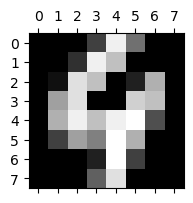

My prediction is 4
sk prediction is 4
Actual number is 4


In [20]:
idx = np.random.randint(X_test.shape[0]) # 랜덤한 인덱스 선택
dimage = X_test_org[idx].reshape((8,8)) # 이미지 데이터를 8*8로 reshape
plt.figure(figsize=(2, 2)) # 이미지 크기 설정
plt.gray() # 흑백 이미지로 출력
plt.matshow(dimage, fignum=1) # 이미지 출력
plt.show() # 이미지 출력

X_input = np.expand_dims(X_test[idx], 0) # 입력 데이터의 shape을 (1, 64)로 변환

# print(X_input.shape) # 입력 데이터의 shape 출력
y_pred = my_predict(l1, l2, l3, X_input) # 내가 구현한 모델로 예측

s_pred = mlp.predict(X_input) # sklearn의 모델로 예측

print('My prediction is ' + str(y_pred[0])) # 내가 구현한 모델의 예측
print('sk prediction is ' + str(s_pred[0])) # sklearn의 모델의 예측
print('Actual number is ' + str(y_test[idx])) # 실제 정답 레이블

(c) 2024 SW Lee